In [1]:
import numpy as np #getting required libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cmaps

def henon_map(x, y, a, b): #function definition for the recursive henon function
    x_next = 1 - a * x**2 + y #defining stepwise
    y_next = b * x
    return x_next, y_next

**Bifurcation Diagram**

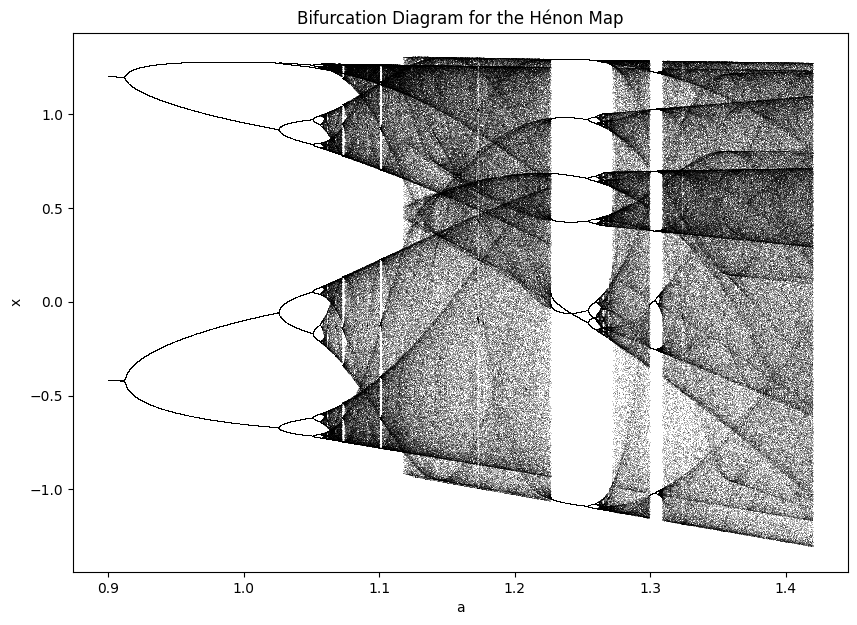

In [2]:
#varying through parameter a values
a_values = np.linspace(0.9, 1.42, 10000) #0.9 and 1.42 chosen as the limits because values out of this range cause overflow
b = 0.3 #holding a constant standard b parameter
iterations = 1000 
last = 100  #number of iterations to plot after transient

#initialize arrays to store x and y values, for matrix purposes
x = np.ones(10000) * 0.1  # Initial x value for all 'a' values, initial conditions in standard range
y = np.ones(10000) * 0.3  # Initial y value for all 'a' values
plt.figure(figsize=(10, 7))

for i in range(iterations): #each iteration is a step on the henon map
    x, y = henon_map(x, y, a_values, b) #updates x and y values based on henon function
    if i >= (iterations - last): #graph after the transient period to study long-term behavior
        plt.plot(a_values, x, ',k', alpha=0.25)  #plotting the x values
#plotting
plt.title('Bifurcation Diagram for the Hénon Map')
plt.xlabel('a')
plt.ylabel('x')
plt.show()

**Plotting the time series of periodic and chaotic regions**

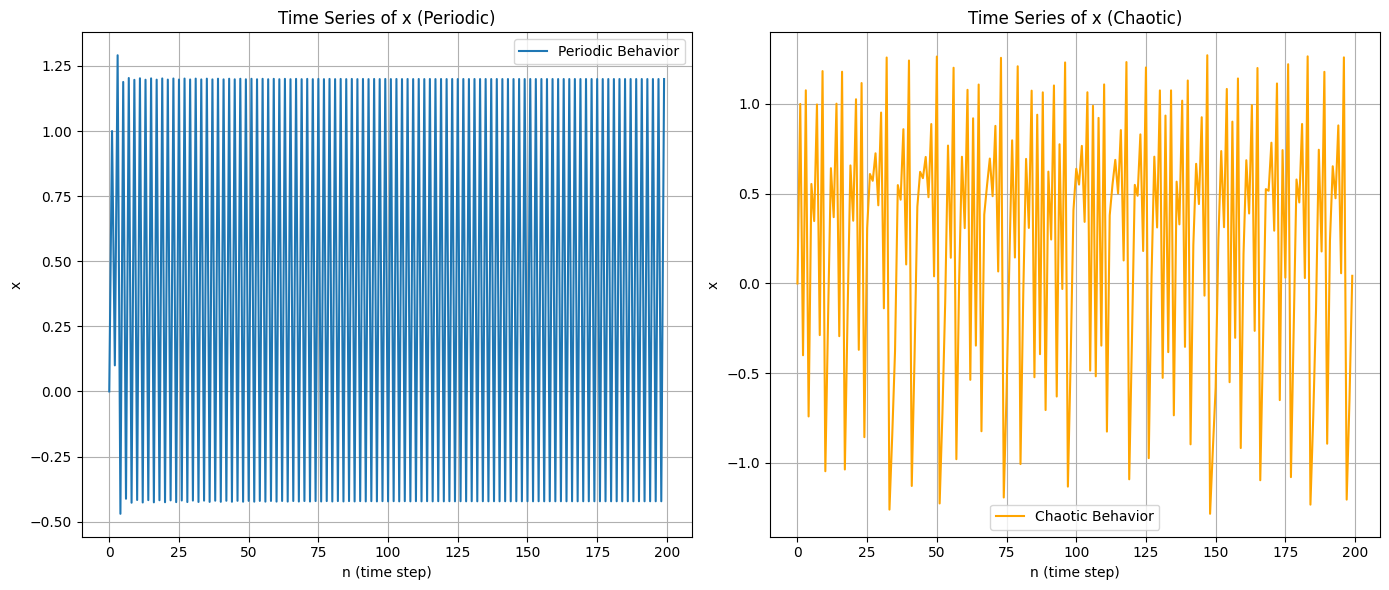

In [3]:
# Define Hénon map function
def henon_map(x, y, a, b):
    return 1 - a * x**2 + y, b * x #here we define it not in terms of the next step

# Number of iterations and initial conditions
num_iterations = 1000 #standard number of iterations
x0, y0 = 0.0, 0.0 #standard initial conditions, although arbitrary because trying to show how parameters affect the periodic and chaotic regions

# Parameters
a_periodic = 0.9 #periodic based on the bifurcation diagram
b_periodic = 0.3 #constant b value
a_chaotic = 1.4 #standard chaotic parameter based on theory as well as the bifurcation diagram
b_chaotic = 0.3

# Initialize arrays to store time series data
x_series_periodic = np.zeros(num_iterations) #set all values to zero and allow it to update based on calculated values
y_series_periodic = np.zeros(num_iterations)
x_series_chaotic = np.zeros(num_iterations)
y_series_chaotic = np.zeros(num_iterations)

# Generate time series for periodic region
x, y = x0, y0 #initial conditions as above
for i in range(num_iterations):
    x_series_periodic[i] = x #stores values as iterations progress
    y_series_periodic[i] = y
    x, y = henon_map(x, y, a_periodic, b_periodic) #computes based on periodic parameters

# Generate time series for chaotic, similar to periodic above
x, y = x0, y0
for i in range(num_iterations):
    x_series_chaotic[i] = x
    y_series_chaotic[i] = y
    x, y = henon_map(x, y, a_chaotic, b_chaotic) #computes based on chaotic parameters

# Define range limits
start = 0
end = 200 #chose 200 based on what best displayed the results

# Plot time series of x for periodic behavior
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) #creating two subplots
plt.plot(range(start, end), x_series_periodic[start:end], label='Periodic Behavior') #based on the start/end range set above
plt.xlabel('n (time step)')
plt.ylabel('x')
plt.title('Time Series of x (Periodic)')
plt.legend()
plt.grid(True)

# Plot time series of x for chaotic behavior
plt.subplot(1, 2, 2)
plt.plot(range(start, end), x_series_chaotic[start:end], label='Chaotic Behavior', color='orange')
plt.xlabel('n (time step)')
plt.ylabel('x')
plt.title('Time Series of x (Chaotic)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
#shows chaotic regions vs periodic regions based on values from the bifurcation diagram

**Sensitivity of system to Initial Conditions**

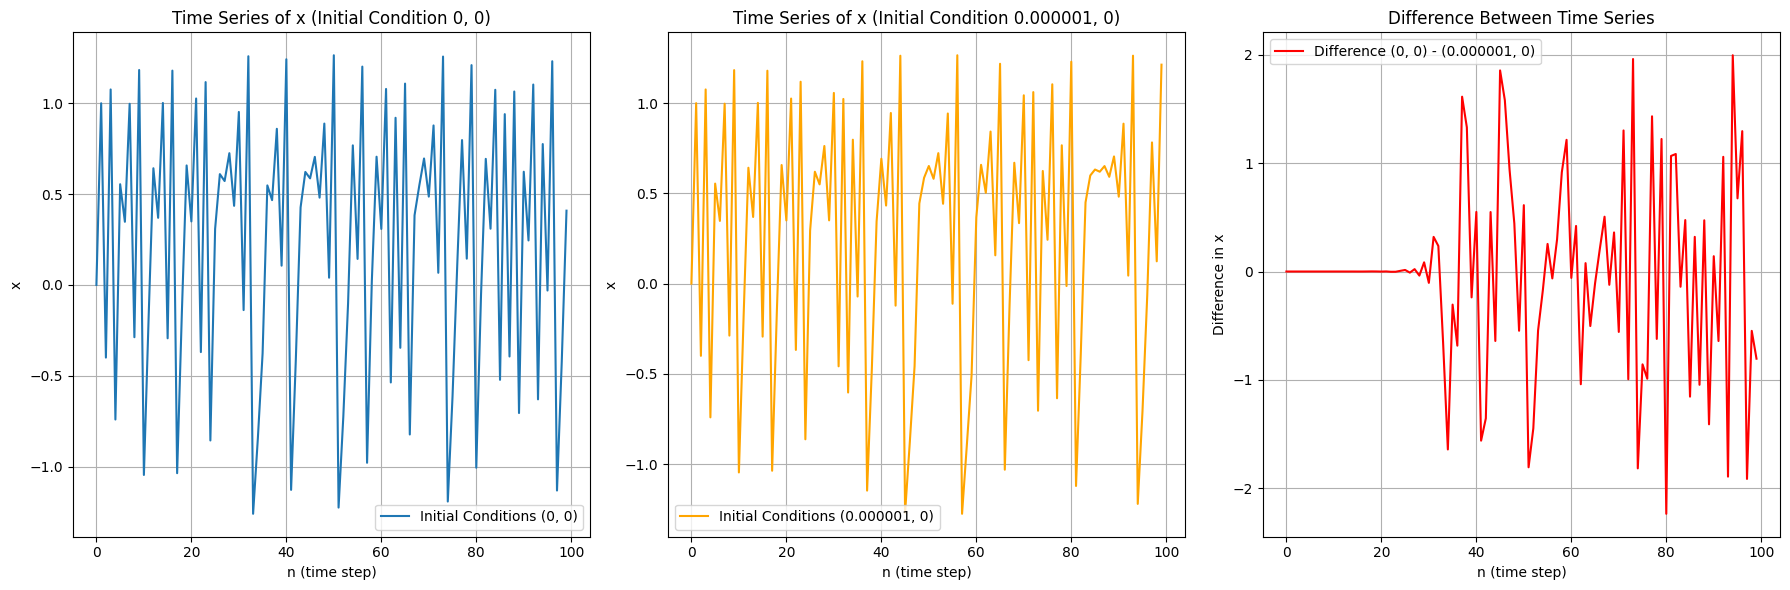

In [4]:
# Number of iterations
num_iterations = 1000
#using the same henon map function as the time series
# Parameters for chaotic behavior, chose standard chaotic parameters because we want to see the divergence of behavior in the chaotic regions
a_chaotic = 1.4
b_chaotic = 0.3

#Sets of initial conditions, only slightly different from one another to show the sensitivity of the attractor to initial conditions
initial_conditions = [
    (0.0, 0.0),
    (0.000001, 0.0)
]

# Initialize arrays to store time series data
x_series1 = np.zeros(num_iterations) #first initial condition set
x_series2 = np.zeros(num_iterations) #second initial condition set
difference_series = np.zeros(num_iterations) #want to visualize the difference between the two series

# Generate time series for initial conditions (0, 0)
x, y = initial_conditions[0] #setting to corresponding initial condition
for i in range(num_iterations):
    x_series1[i] = x
    x, y = henon_map(x, y, a_chaotic, b_chaotic)

# Generate time series for initial conditions (0.000001, 0)
x, y = initial_conditions[1]
for i in range(num_iterations):
    x_series2[i] = x
    x, y = henon_map(x, y, a_chaotic, b_chaotic)

#difference between the two time series
difference_series = x_series1 - x_series2

# Define range limits
start = 0
end = 100

# Plotting time series
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1) #want three subplots, one for each initial condition and one for the difference
plt.plot(range(start, end), x_series1[start:end], label='Initial Conditions (0, 0)') #range based on the limits above
plt.xlabel('n (time step)')
plt.ylabel('x')
plt.title('Time Series of x (Initial Condition 0, 0)')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(start, end), x_series2[start:end], label='Initial Conditions (0.000001, 0)', color='orange')
plt.xlabel('n (time step)')
plt.ylabel('x')
plt.title('Time Series of x (Initial Condition 0.000001, 0)')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(range(start, end), difference_series[start:end], label='Difference (0, 0) - (0.000001, 0)', color='red')
plt.xlabel('n (time step)')
plt.ylabel('Difference in x')
plt.title('Difference Between Time Series')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Recursive step difference**

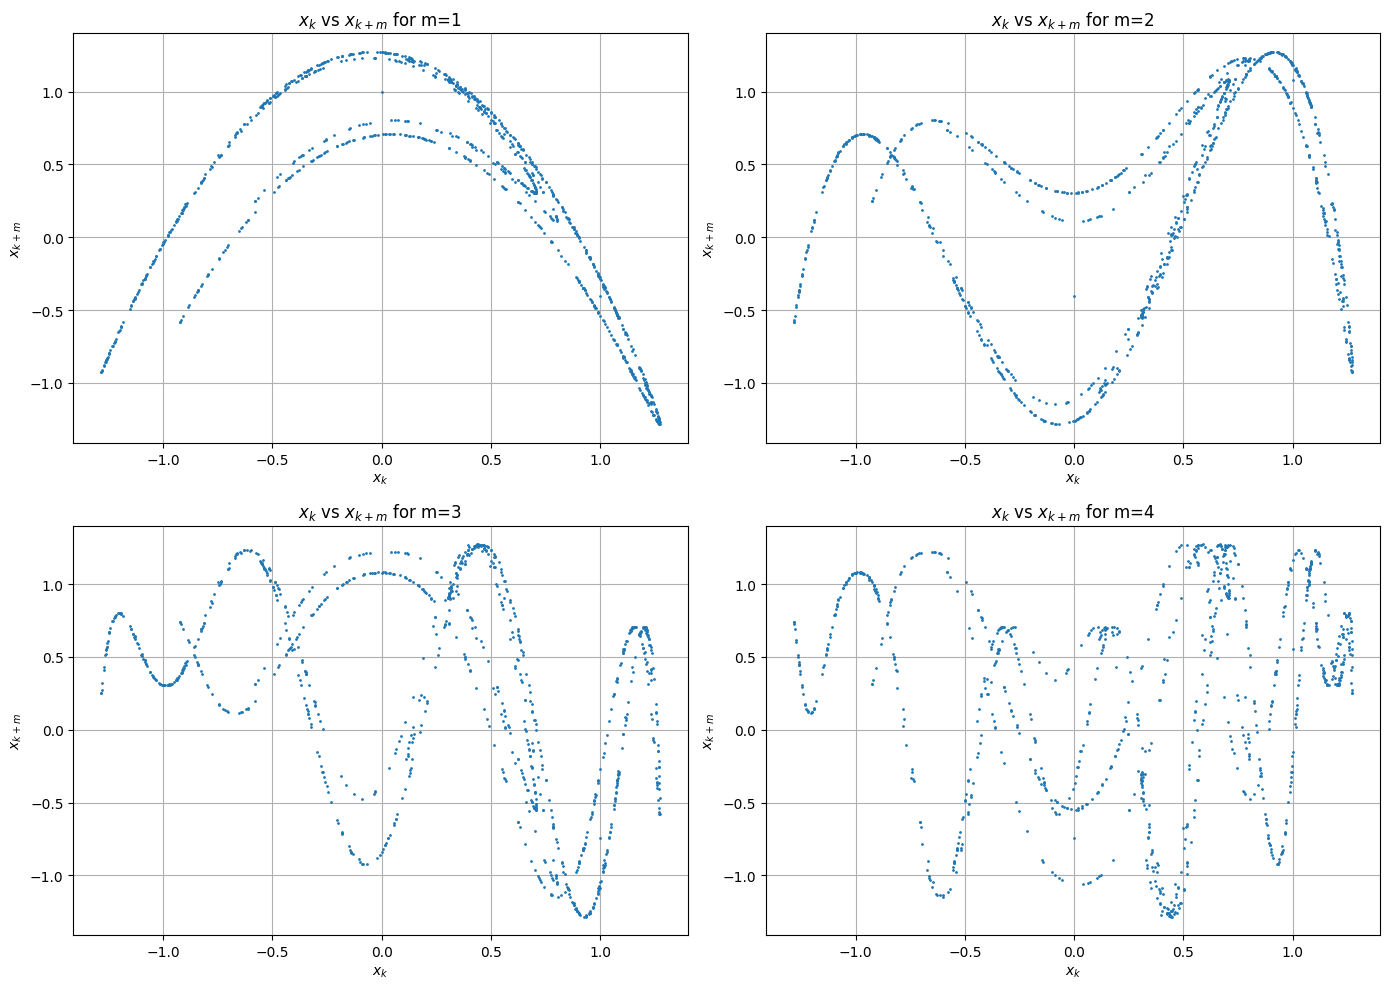

In [6]:
#recursive step difference
# Define Hénon map function
def henon_map(x, y, a, b):
    return 1 - a * x**2 + y, b * x #defining again so that it doesn't use the definition from the bifurcation diagram

# Number of iterations
num_iterations = 1000

# Parameters for chaotic behavior
a_chaotic = 1.4
b_chaotic = 0.3

# Initial conditions
x0, y0 = 0.0, 0.0

# Initialize array to store time series data
x_series = np.zeros(num_iterations)

# Generate time series for initial conditions (0, 0)
x, y = x0, y0 #initial conditions
for i in range(num_iterations): #iterating 1000 times
    x_series[i] = x #updating values
    x, y = henon_map(x, y, a_chaotic, b_chaotic)

# Define step values (want to show difference in graph for recursive steps of m)
m_values = [1, 2, 3, 4]

# Plot x_k+m vs. x_k for different values of m
plt.figure(figsize=(14, 10))

for i, m in enumerate(m_values, start=1): #iterating through each m value (each recursive step m)
    plt.subplot(2, 2, i) #creates subplots based on number of m values iterated through
    
    #avoid out-of-bounds indexing
    k = np.arange(num_iterations - m) #creates array from 0 to num_iterations - m - 1, so that k + m is still in the index range of the x_series
    x_k = x_series[k]
    x_k_plus_m = x_series[k + m]
    
    plt.plot(x_k, x_k_plus_m, 'o', markersize=1) #plotting x_k and the subsequent x_k+m
    plt.xlabel(f'$x_k$') #searched for latex notation to represent subscript
    plt.ylabel(f'$x_{{k+m}}$')
    plt.title(f'$x_k$ vs $x_{{k+m}}$ for m={m}') #creating label for each subplot i
    plt.grid(True)

plt.tight_layout()
plt.show()